# **1. Perkenalan Dataset**


# **Spotify Analysis and Visualization Dataset**

Dataset ini diambil dari Kaggle:

[Spotify Analysis and Visualization Dataset](https://www.kaggle.com/datasets/aliiihussain/spotify-analysis-and-visualization/data)

### **Deskripsi Dataset**

Dataset ini berisi data lagu dari Spotify pada level *track*. Setiap baris merepresentasikan satu lagu tunggal. Data ini merupakan gabungan antara **metadata lagu** dan **fitur audio** yang diekstraksi langsung dari API Spotify. Dataset ini sudah melalui tahap pembersihan (cleaned) dan terstruktur, sehingga siap digunakan untuk analisis eksploratif (EDA) maupun pemodelan *machine learning*.

---

### **Jenis Data yang Tersedia**

| Kategori | Deskripsi Fitur |
| --- | --- |
| **Identitas Lagu** | Judul lagu (*track name*), nama artis, dan skor popularitas. |
| **Fitur Audio (Numerik)** | *Danceability, energy, loudness, tempo, acousticness,* dan *valence*. |
| **Data untuk Analisis** | Data numerik yang siap untuk statistik, visualisasi distribusi, dan algoritma ML. |


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

warnings.filterwarnings('ignore')
print("Library Spotify Analysis berhasil diimpor!")

Library Spotify Analysis berhasil diimpor!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
dataset_path = 'spotify_analysis_dataset.csv'
df = pd.read_csv(dataset_path)

In [ ]:
print("5 Baris Pertama Dataset:")
display(df.head())

5 Baris Pertama Dataset:


,track_id,track_name,artist,album,release_date,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,TRK1000,Song 0,Artist 7,Album 3,2010-01-01,240151,70,0.037,0.349,-2.87,0.522,0.616,0.931,0.947,0.353,110.14
1,TRK1001,Song 1,Artist 4,Album 5,2010-01-02,253767,58,0.610,0.726,-22.87,0.770,0.635,0.858,0.986,0.584,75.90
2,TRK1002,Song 2,Artist 13,Album 19,2010-01-03,244375,85,0.503,0.897,-1.33,0.216,0.045,0.429,0.753,0.078,154.02
3,TRK1003,Song 3,Artist 11,Album 7,2010-01-04,299262,27,0.051,0.887,-1.46,0.623,0.375,0.751,0.376,0.974,132.84
4,TRK1004,Song 4,Artist 8,Album 9,2010-01-05,256330,65,0.279,0.780,-5.88,0.085,0.626,0.755,0.084,0.986,168.12


In [ ]:
print("\nInformasi Dataset:")
df.info()



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          50 non-null     object 
 1   track_name        50 non-null     object 
 2   artist            50 non-null     object 
 3   album             50 non-null     object 
 4   release_date      50 non-null     object 
 5   duration_ms       50 non-null     int64  
 6   popularity        50 non-null     int64  
 7   danceability      50 non-null     float64
 8   energy            50 non-null     float64
 9   loudness          50 non-null     float64
 10  speechiness       50 non-null     float64
 11  acousticness      50 non-null     float64
 12  instrumentalness  50 non-null     float64
 13  liveness          50 non-null     float64
 14  valence           50 non-null     float64
 15  tempo             50 non-null     float64
dtypes: float64(9), int64(2), o

In [ ]:
print("\nStatistik Deskriptif:")
display(df.describe())


Statistik Deskriptif:


,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,212726.100000,50.320000,0.47420,0.506000,-17.696000,0.455460,0.496620,0.517740,0.529320,0.607080,126.094000
std,47725.482111,27.528419,0.29023,0.299962,11.567047,0.278252,0.304199,0.311123,0.321099,0.305826,39.179744
min,128392.000000,0.000000,0.01700,0.005000,-38.780000,0.014000,0.018000,0.011000,0.011000,0.026000,62.040000
25%,170575.250000,27.500000,0.23850,0.238750,-26.265000,0.224000,0.217500,0.299500,0.278000,0.377250,90.762500
50%,227562.500000,55.500000,0.50750,0.572500,-17.035000,0.473500,0.560500,0.527500,0.541000,0.645000,126.590000
75%,246702.250000,69.750000,0.67650,0.725000,-7.607500,0.687000,0.747000,0.791500,0.846000,0.861250,152.945000
max,299262.000000,96.000000,0.98600,0.973000,-0.400000,0.976000,0.991000,0.987000,0.993000,1.000000,197.200000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

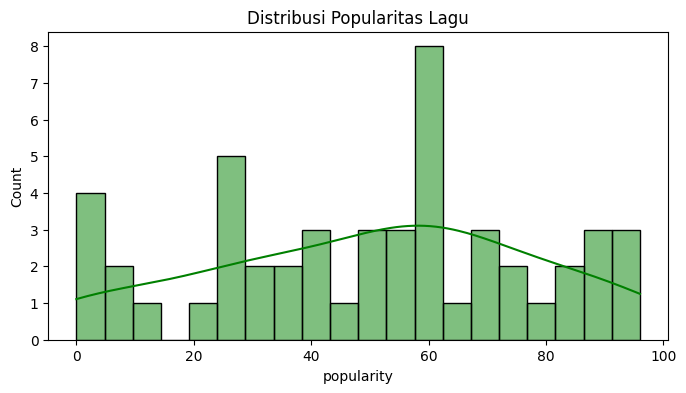

In [ ]:

plt.figure(figsize=(8, 4))
sns.histplot(df['popularity'], bins=20, kde=True, color='green')
plt.title('Distribusi Popularitas Lagu')
plt.show()



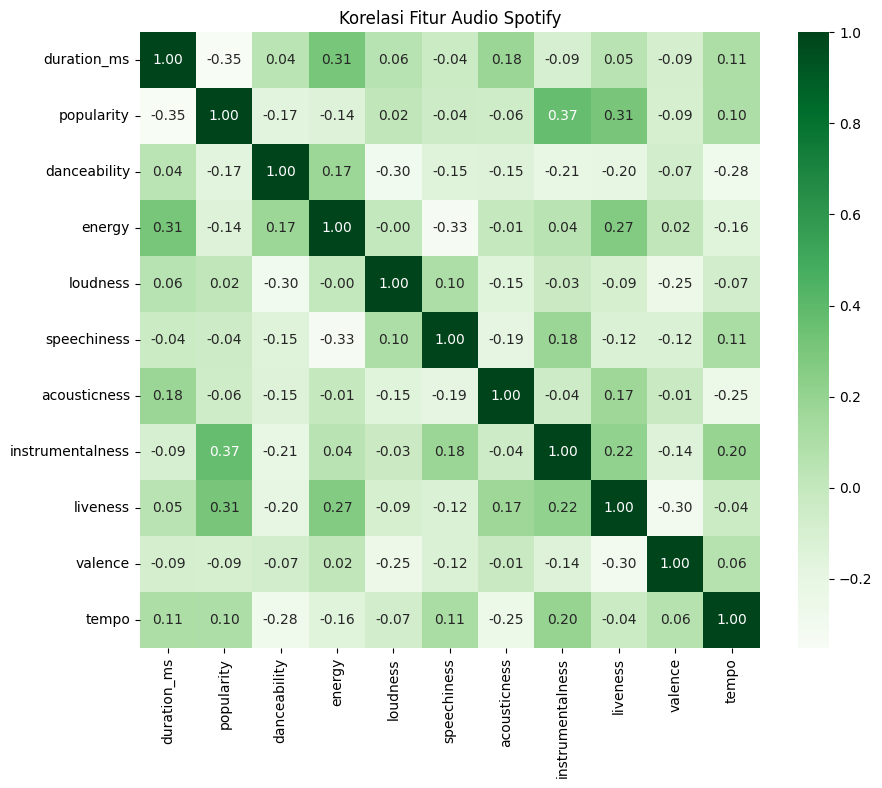

In [ ]:

numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='Greens')
plt.title('Korelasi Fitur Audio Spotify')
plt.show()


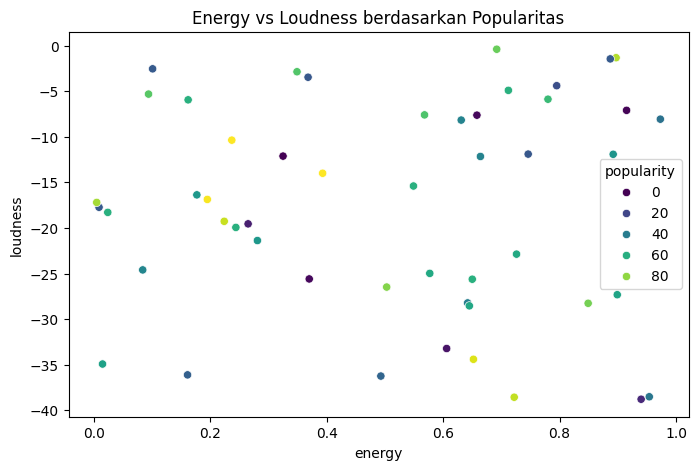

In [ ]:


plt.figure(figsize=(8, 5))
sns.scatterplot(x='energy', y='loudness', hue='popularity', data=df, palette='viridis')
plt.title('Energy vs Loudness berdasarkan Popularitas')
plt.show()

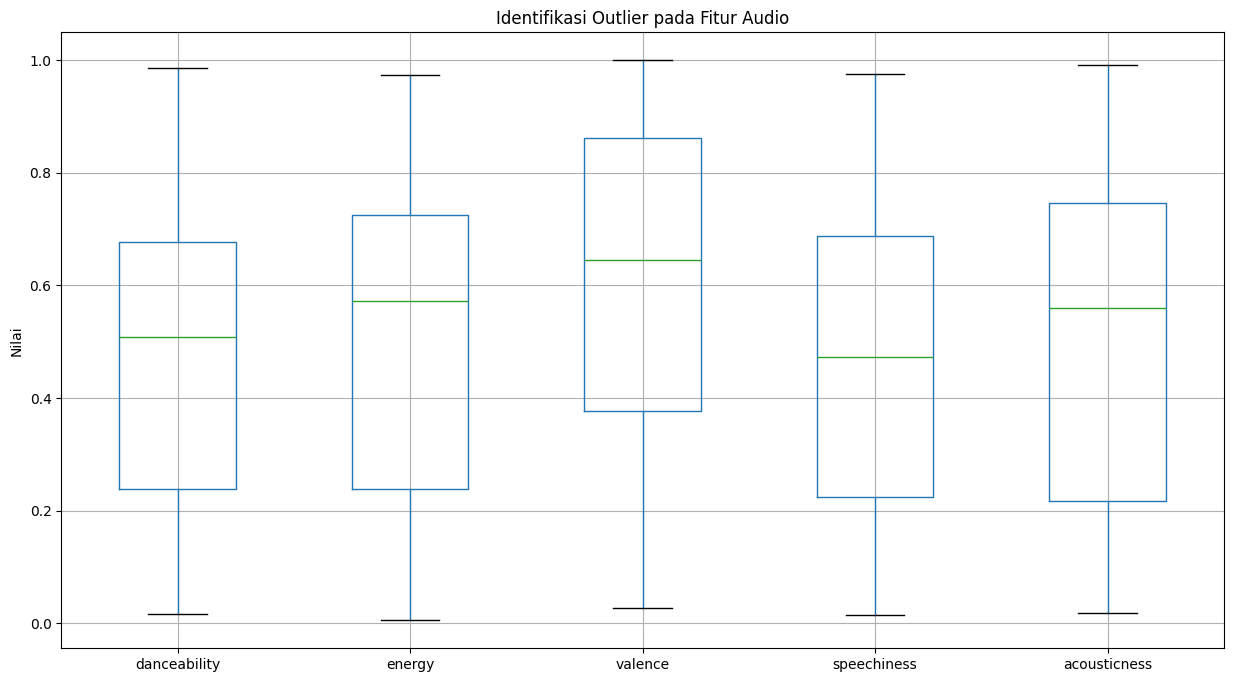

In [ ]:
plt.figure(figsize=(15, 8))

features = ['danceability', 'energy', 'valence', 'speechiness', 'acousticness']
df[features].boxplot()
plt.title('Identifikasi Outlier pada Fitur Audio')
plt.ylabel('Nilai')
plt.show()

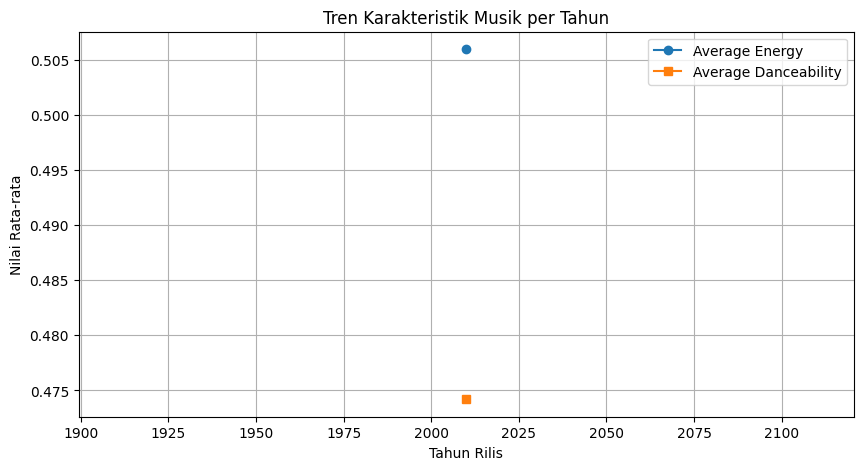

In [ ]:

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

yearly_trends = df.groupby('release_year')[['energy', 'danceability']].mean()

plt.figure(figsize=(10, 5))
plt.plot(yearly_trends.index, yearly_trends['energy'], label='Average Energy', marker='o')
plt.plot(yearly_trends.index, yearly_trends['danceability'], label='Average Danceability', marker='s')
plt.title('Tren Karakteristik Musik per Tahun')
plt.xlabel('Tahun Rilis')
plt.ylabel('Nilai Rata-rata')
plt.legend()
plt.grid(True)
plt.show()

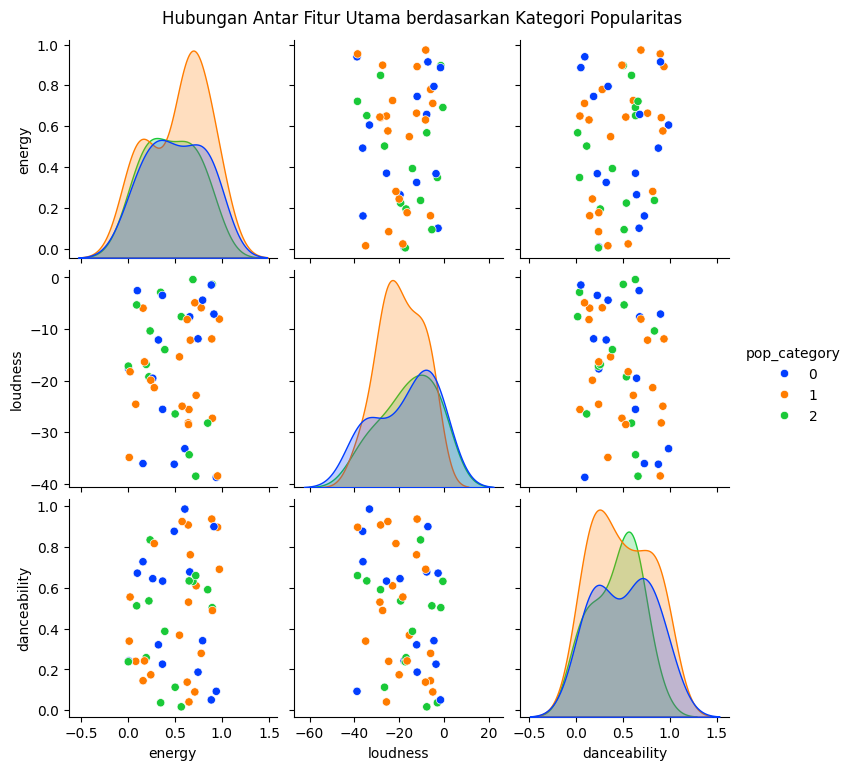

In [ ]:
def categorize_popularity(score):
    if score <= 33: return 0
    elif score <= 66: return 1
    else: return 2

df['pop_category'] = df['popularity'].apply(categorize_popularity)

selected_features = ['energy', 'loudness', 'danceability', 'pop_category']
sns.pairplot(df[selected_features], hue='pop_category', palette='bright')
plt.suptitle('Hubungan Antar Fitur Utama berdasarkan Kategori Popularitas', y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:

def categorize_popularity(score):
    if score <= 33: return 0
    elif score <= 66: return 1
    else: return 2

df['pop_category'] = df['popularity'].apply(categorize_popularity)


In [ ]:


df_model = df.drop(['track_id', 'track_name', 'artist', 'album', 'release_date', 'popularity'], axis=1)



In [ ]:

X = df_model.drop('pop_category', axis=1)
y = df_model['pop_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
train_cleaned = pd.DataFrame(X_train_scaled, columns=X.columns)
train_cleaned['pop_category'] = y_train.values
train_cleaned.to_csv('spotify_preprocessing.csv', index=False)

print("Preprocessing Spotify Selesai. Data siap dilatih!")

Preprocessing Spotify Selesai. Data siap dilatih!
